In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [4]:
#Getting region 270-355 for DIFF BUM HMM OUTPUT 

df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [461:496, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output['difference_diffBUMHMM'] = df_diff_bumhmm_output['UM'] - df_diff_bumhmm_output['MU']

df_diff_bumhmm_output= df_diff_bumhmm_output.drop(['UM', 'MU'], axis=1)

#df_pea_output = df_pea_output.iloc[0:10, :]



df_diff_bumhmm_output.reset_index(drop=True)



df_diff_bumhmm_output.head()


,difference_diffBUMHMM
462,9.955108e-01
463,9.763070e-07
464,8.843954e-03
465,1.865845e-07
466,5.136620e-08


In [5]:
#Getting region 270-355 FOR DELTASHAPE

df_deltashape = pd.read_csv('../../Data/Map files 35S/average_delta_shape_462_496.txt', sep="\t", header=0)


#print(df_deltashape.columns)

#df_deltashape = df_deltashape[[" Nuc","DSHAPE" ]]
#df_deltashape

new_df_2 = df_deltashape.set_index('nuc').join(df_diff_bumhmm_output)

new_df_2

,deltaSHAPE,difference_diffBUMHMM
nuc,,
462,0.000000,9.955108e-01
463,0.070157,9.763070e-07
464,0.000000,8.843954e-03
465,0.088928,1.865845e-07
466,0.065865,5.136620e-08
467,-0.000067,-2.769549e-06
468,-0.000060,-2.210239e-06
469,0.105425,1.991120e-36
470,0.094225,6.964975e-01


In [6]:
#Getting region 463-478 FOR dStruct analysis --SEARCH LENGTH 11 NT 

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/output_dStruct_35S_11nt.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[461:496, :]
df_pea_output= df_pea_output.rename_axis('positions').reset_index()
#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head


<bound method NDFrame.head of     positions        A1        A2        B1        B2
0         462  0.328787  0.080997  0.589156  0.145698
1         463  0.326552  0.325506  0.211783  0.144587
2         464  0.320516  0.210779  0.441433  0.138861
3         465  0.692485  0.736816  1.127333  0.850766
4         466  1.079444  1.341082  1.147556  1.108357
5         467  1.214751  1.846280  0.994771  0.841371
6         468  1.184759  1.407092  0.703303  0.613889
7         469  0.000000  0.000000  0.000000  0.000000
8         470  0.116927  0.000000  0.458107  1.010968
9         471  0.000000  0.000000  0.000000  0.000000
10        472  0.131086  0.025045  1.060327  1.025279
11        473  0.182988  0.020990  1.007982  1.157396
12        474  0.118238  0.088660  0.565180  0.676082
13        475  0.236511  0.099465  1.332148  1.413272
14        476  0.067047  0.179130  0.700124  0.579272
15        477  0.125817  0.064226  0.731555  0.300768
16        478  0.213290  0.122311  0.765445  0.42328

In [8]:
new_df = df_pea_output.set_index('positions').join(new_df_2)
new_df

,A1,A2,B1,B2,deltaSHAPE,difference_diffBUMHMM
positions,,,,,,
462,0.328787,0.080997,0.589156,0.145698,0.000000,9.955108e-01
463,0.326552,0.325506,0.211783,0.144587,0.070157,9.763070e-07
464,0.320516,0.210779,0.441433,0.138861,0.000000,8.843954e-03
465,0.692485,0.736816,1.127333,0.850766,0.088928,1.865845e-07
466,1.079444,1.341082,1.147556,1.108357,0.065865,5.136620e-08
467,1.214751,1.846280,0.994771,0.841371,-0.000067,-2.769549e-06
468,1.184759,1.407092,0.703303,0.613889,-0.000060,-2.210239e-06
469,0.000000,0.000000,0.000000,0.000000,0.105425,1.991120e-36
470,0.116927,0.000000,0.458107,1.010968,0.094225,6.964975e-01


In [7]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.05 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.05 else x for x in new_df['MU']]

In [9]:
#print(new_df.columns)
new_df = new_df[['difference_diffBUMHMM','deltaSHAPE','A1','A2','B1', 'B2']]
#print(new_df.columns)

new_df.columns = ['diff diffBUMHMM deltaErb minus delta5 ', 'avg_deltaSHAPE', 'SHAPE norm reactivity delta5 rep1','SHAPE norm reactivity delta5 rep2', 'SHAPE norm reactivity deltaerb1 rep1','SHAPE norm reactivity deltaerb1 rep2' ]
#print(new_df.columns)

In [10]:
new_df

,diff diffBUMHMM deltaErb minus delta5,avg_deltaSHAPE,SHAPE norm reactivity delta5 rep1,SHAPE norm reactivity delta5 rep2,SHAPE norm reactivity deltaerb1 rep1,SHAPE norm reactivity deltaerb1 rep2
positions,,,,,,
462,9.955108e-01,0.000000,0.328787,0.080997,0.589156,0.145698
463,9.763070e-07,0.070157,0.326552,0.325506,0.211783,0.144587
464,8.843954e-03,0.000000,0.320516,0.210779,0.441433,0.138861
465,1.865845e-07,0.088928,0.692485,0.736816,1.127333,0.850766
466,5.136620e-08,0.065865,1.079444,1.341082,1.147556,1.108357
467,-2.769549e-06,-0.000067,1.214751,1.846280,0.994771,0.841371
468,-2.210239e-06,-0.000060,1.184759,1.407092,0.703303,0.613889
469,1.991120e-36,0.105425,0.000000,0.000000,0.000000,0.000000
470,6.964975e-01,0.094225,0.116927,0.000000,0.458107,1.010968


In [11]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')

subsequence= []
for i in ref_sequence[461:496]: 
    subsequence.append(i)
    
new_df.insert(loc=6, column='nucleotide', value=subsequence)



In [15]:
new_df

,diff diffBUMHMM deltaErb minus delta5,avg_deltaSHAPE,SHAPE norm reactivity delta5 rep1,SHAPE norm reactivity delta5 rep2,SHAPE norm reactivity deltaerb1 rep1,SHAPE norm reactivity deltaerb1 rep2,nucleotide
positions,,,,,,,
462,9.955108e-01,0.000000,0.328787,0.080997,0.589156,0.145698,G
463,9.763070e-07,0.070157,0.326552,0.325506,0.211783,0.144587,A
464,8.843954e-03,0.000000,0.320516,0.210779,0.441433,0.138861,G
465,1.865845e-07,0.088928,0.692485,0.736816,1.127333,0.850766,G
466,5.136620e-08,0.065865,1.079444,1.341082,1.147556,1.108357,A
467,-2.769549e-06,-0.000067,1.214751,1.846280,0.994771,0.841371,A
468,-2.210239e-06,-0.000060,1.184759,1.407092,0.703303,0.613889,A
469,1.991120e-36,0.105425,0.000000,0.000000,0.000000,0.000000,C
470,6.964975e-01,0.094225,0.116927,0.000000,0.458107,1.010968,T


0
0
positions
462    9.955108e-01
463    9.763070e-07
464    8.843954e-03
465    1.865845e-07
466    5.136620e-08
467   -2.769549e-06
468   -2.210239e-06
469    1.991120e-36
470    6.964975e-01
471    1.287995e-26
472    9.999997e-01
473    1.000000e+00
474    1.929894e-01
475    1.000000e+00
476    9.999608e-01
477    9.999295e-01
478    9.999886e-01
479    7.554403e-04
480   -1.745921e-20
481   -3.029392e-30
482   -1.469848e-03
483   -2.070930e-03
484   -5.598626e-02
485   -2.867845e-05
486   -8.804257e-01
487   -1.755318e-03
488   -7.696179e-06
489   -3.019422e-06
490   -1.604655e-05
491   -4.778158e-01
492    2.549846e-08
493   -9.638975e-01
494   -1.154471e-09
495   -1.972032e-23
496    2.333310e-23
Name: diff diffBUMHMM deltaErb minus delta5 , dtype: float64
0
1
1
positions
462    0.000000
463    0.070157
464    0.000000
465    0.088928
466    0.065865
467   -0.000067
468   -0.000060
469    0.105425
470    0.094225
471    0.133388
472    0.144602
473    0.152788
474    0.145179
4

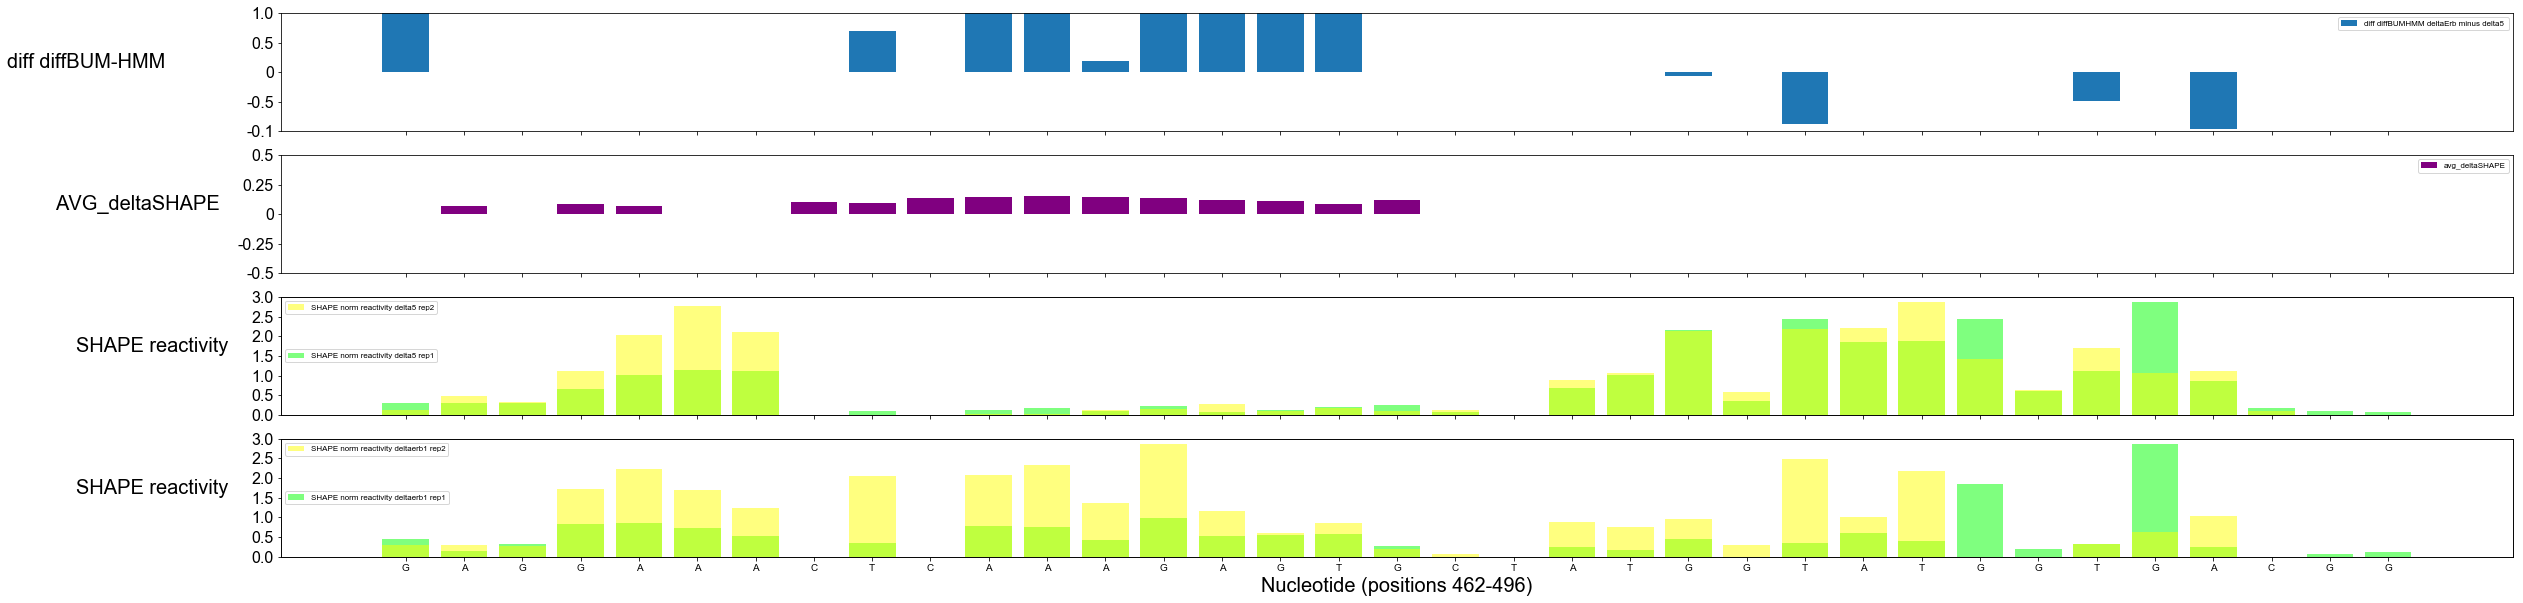

In [17]:
from matplotlib.ticker import LinearLocator

fig,ax = plt.subplots(4,sharex=True,figsize=[40,10])
x = new_df.index

for i in range(6):
    print(i)
    if i == 0:
        
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(i)
        print(y)
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        print(i)
        ax[i].set_ylim([-1.0, 1.0])
         
        yticks = [-0.1,-0.5,0,0.5,1.0]
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=8)
        ax[i].set_ylabel('diff diffBUM-HMM', rotation=0, fontsize=20, labelpad=160)
    

    elif i == 1:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(i)
        print(y)
        ax[i].bar(x,y, color=(0.5, 0, 0.5))
        ax[i].set_xticklabels(x,fontsize=16)
        print(y)
        print(x)
        #print(i)
        #miny = -0.5
        #maxy = 0.5
        
        #yticks = np.arange(miny,maxy+1,0.25)
        yticks = [-0.5,-0.25,0,0.25,0.5]
        ax[i].set_ylim([-0.5, 0.5])
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=8)
        ax[i].set_ylabel('AVG_deltaSHAPE', rotation=0, fontsize=20, labelpad=100)
        
        
        
    elif i == 2:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=7))
    
        column = new_df.columns[i]
        y = new_df[column]
        
        column_2 = new_df.columns[i+1]
        y_2 = new_df[column_2]
        
        miny = 0
        maxy = 3
        yticks = np.arange(miny,maxy+1,0.5)
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        #ax[i].set_ylim([0, 3.0])
        
        
        ax[i].bar(x,y, color=(0.0, 1.0, 0.0), alpha=0.5)
        
        ax2 = ax[i].twinx()
        
        ax2.bar(x,y_2, color=(1.0, 1.0, 0.0), alpha=0.5)
        
        ax2.get_yaxis().set_visible(False)
        
        #ax2.set_ylim([0, 3.0])

        print('y is')
        print(y)
        print('y_2 is')
        print(y_2)
        #ax2.set_yticklabels(yticks,fontsize=16)
        #ax2.get_yaxis().set_major_locator(LinearLocator(numticks=5))

        #ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column],loc=6 ,fontsize=8)
        ax2.legend([column_2],loc=2, fontsize=8)
        ax[i].set_ylabel('SHAPE reactivity', rotation=0, fontsize=20, labelpad=100)
        
        
    elif i == 3:
        
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=7))
    
        column = new_df.columns[i+1]
        y = new_df[column]
        
        column_2 = new_df.columns[i+2]
        y_2 = new_df[column_2]
        
        miny = 0
        maxy = 3
        yticks = np.arange(miny,maxy+1,0.5)
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        #ax[i].set_ylim([0, 3.0])
        
        
        ax[i].bar(x,y, color=(0.0, 1.0, 0.0), alpha=0.5)
        
        ax2 = ax[i].twinx()
        
        ax2.bar(x,y_2, color=(1.0, 1.0, 0.0), alpha=0.5)
        
        ax2.get_yaxis().set_visible(False)
        
        #ax2.set_ylim([0, 3.0])

        print('y is')
        print(y)
        print('y_2 is')
        print(y_2)
        #ax2.set_yticklabels(yticks,fontsize=16)
        #ax2.get_yaxis().set_major_locator(LinearLocator(numticks=5))

        #ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column],loc=6 ,fontsize=8)
        ax2.legend([column_2],loc=2, fontsize=8)
        ax[i].set_ylabel('SHAPE reactivity', rotation=0, fontsize=20, labelpad=100)
        ax[i].set_xlabel('Nucleotide (positions 462-496)', fontsize=20)


fig.savefig("diff_BUM_HMM_vs_dStruct_plot_462_496_threshold__0_05_both_replicates_overlay_search_length_11nt_average_deltashape.pdf",dpi=400)   

In [19]:
df_diff_bumhmm_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/35S_diffBUM_HMM_WT_vs_Erb1_diff_BUM_HMM_analysed.txt', sep="\t", header=0)
df_diff_bumhmm_output = df_diff_bumhmm_output.iloc [2442:2466, 1:3]

#df_diff_bumhmm_output= df_diff_bumhmm_output.iloc[0:10, :]

df_diff_bumhmm_output['difference_diffBUMHMM'] = df_diff_bumhmm_output['UM'] - df_diff_bumhmm_output['MU']

df_diff_bumhmm_output= df_diff_bumhmm_output.drop(['UM', 'MU'], axis=1)

#df_pea_output = df_pea_output.iloc[0:10, :]

df_diff_bumhmm_output.reset_index(drop=True)

df_diff_bumhmm_output.head

<bound method NDFrame.head of       difference_diffBUMHMM
2443           1.452477e-01
2444           6.187937e-03
2445           9.999999e-01
2446           6.166244e-05
2447           5.815774e-08
2448           4.072999e-05
2449           2.053582e-09
2450           5.174813e-16
2451           7.489932e-88
2452           1.491604e-62
2453           9.999985e-01
2454           2.250703e-05
2455           1.270507e-09
2456           6.391882e-08
2457           7.743780e-14
2458           1.373150e-02
2459           9.999996e-01
2460           9.999998e-01
2461           5.534127e-01
2462           9.534631e-01
2463           2.879200e-01
2464           8.995284e-55
2465           3.588538e-07
2466          -9.675862e-09>

In [21]:
#Getting region 2453-2463 FOR dStruct analysis

df_pea_output = pd.read_csv('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/output_dStruct_35S.txt', sep="\t", header=0)
df_pea_output = df_pea_output.iloc[2442:2466, :]
df_pea_output= df_pea_output.rename_axis('positions').reset_index()
#df_pea_output = df_pea_output.iloc[0:10, :]
df_pea_output.head


<bound method NDFrame.head of     positions        A1        A2        B1        B2
0        2443  0.019498  0.000000  0.193170  0.239741
1        2444  0.112059  0.053207  0.313519  0.163228
2        2445  0.262815  0.003705  0.824366  0.591629
3        2446  0.463678  0.487497  0.603300  1.214839
4        2447  0.010007  0.005401  0.089296  0.014588
5        2448  0.000000  0.000000  0.428694  0.134271
6        2449  0.000000  0.013788  0.180190  0.219522
7        2450  0.000000  0.000000  0.000000  0.115617
8        2451  0.000000  0.000000  0.000000  0.000000
9        2452  0.000000  0.000000  0.000000  0.000000
10       2453  0.339507  0.064586  0.651792  0.956317
11       2454  0.928956  0.502840  2.784255  2.614838
12       2455  0.902840  0.705714  2.658357  2.978752
13       2456  0.739089  0.556058  2.236010  1.816087
14       2457  0.000000  0.000000  0.382789  0.208489
15       2458  0.489661  0.196682  0.964443  1.092873
16       2459  0.459963  0.152811  1.638087  1.32352

In [22]:
new_df = df_pea_output.set_index('positions').join(df_diff_bumhmm_output)
new_df.head

<bound method NDFrame.head of                  A1        A2        B1        B2  difference_diffBUMHMM
positions                                                               
2443       0.019498  0.000000  0.193170  0.239741           1.452477e-01
2444       0.112059  0.053207  0.313519  0.163228           6.187937e-03
2445       0.262815  0.003705  0.824366  0.591629           9.999999e-01
2446       0.463678  0.487497  0.603300  1.214839           6.166244e-05
2447       0.010007  0.005401  0.089296  0.014588           5.815774e-08
2448       0.000000  0.000000  0.428694  0.134271           4.072999e-05
2449       0.000000  0.013788  0.180190  0.219522           2.053582e-09
2450       0.000000  0.000000  0.000000  0.115617           5.174813e-16
2451       0.000000  0.000000  0.000000  0.000000           7.489932e-88
2452       0.000000  0.000000  0.000000  0.000000           1.491604e-62
2453       0.339507  0.064586  0.651792  0.956317           9.999985e-01
2454       0.928956  

In [5]:
#THRESHOLDING DIFF BUM HMM OUTPUT
new_df['UM'] = [0 if x<0.05 else x for x in new_df['UM']]
new_df['MU'] = [0 if x<0.05 else x for x in new_df['MU']]

In [23]:
#print(new_df.columns)
new_df = new_df[['difference_diffBUMHMM','A1','A2','B1', 'B2']]
#print(new_df.columns)

new_df.columns = ['diff diffBUMHMM deltaErb minus delta5 ', 'SHAPE norm reactivity delta5 rep1','SHAPE norm reactivity delta5 rep2', 'SHAPE norm reactivity deltaerb1 rep1','SHAPE norm reactivity deltaerb1 rep2' ]
#print(new_df.columns)

In [24]:
with open('C:/Users/maran/Desktop/diff_BUM_HMM_Project/Github/diff_BUM_HMM/Reference sequences/35S pre-rRNA_refseq.seq', 'r') as file:
    ref_sequence = file.read().replace('\n', '')

subsequence= []
for i in ref_sequence[2442:2466]: 
    subsequence.append(i)
    
new_df.insert(loc=5, column='nucleotide', value=subsequence)



0
0
positions
2443    1.452477e-01
2444    6.187937e-03
2445    9.999999e-01
2446    6.166244e-05
2447    5.815774e-08
2448    4.072999e-05
2449    2.053582e-09
2450    5.174813e-16
2451    7.489932e-88
2452    1.491604e-62
2453    9.999985e-01
2454    2.250703e-05
2455    1.270507e-09
2456    6.391882e-08
2457    7.743780e-14
2458    1.373150e-02
2459    9.999996e-01
2460    9.999998e-01
2461    5.534127e-01
2462    9.534631e-01
2463    2.879200e-01
2464    8.995284e-55
2465    3.588538e-07
2466   -9.675862e-09
Name: diff diffBUMHMM deltaErb minus delta5 , dtype: float64
0
1
y is
positions
2443    0.019498
2444    0.112059
2445    0.262815
2446    0.463678
2447    0.010007
2448    0.000000
2449    0.000000
2450    0.000000
2451    0.000000
2452    0.000000
2453    0.339507
2454    0.928956
2455    0.902840
2456    0.739089
2457    0.000000
2458    0.489661
2459    0.459963
2460    0.795622
2461    2.233659
2462    1.680836
2463    0.491340
2464    0.000000
2465    1.861700
2466    1.4

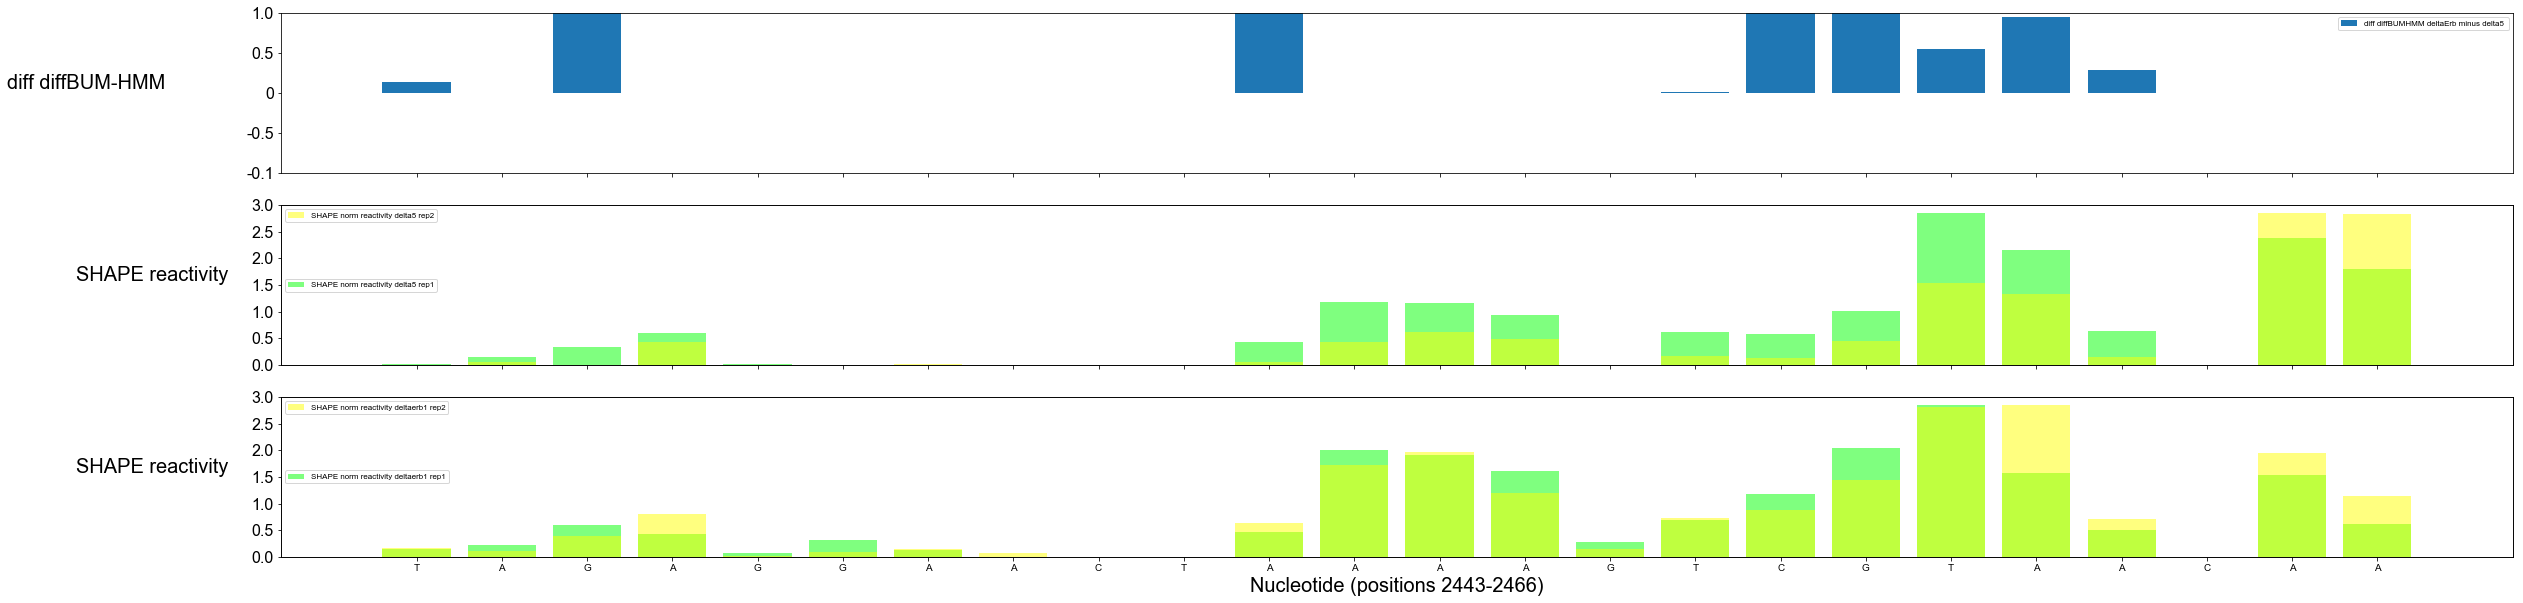

In [25]:
from matplotlib.ticker import LinearLocator

fig,ax = plt.subplots(3,sharex=True,figsize=[40,10])
x = new_df.index

for i in range(5):
    print(i)
    if i == 0:
        
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(i)
        print(y)
        ax[i].bar(x,y)
        ax[i].set_xticklabels(x,fontsize=16)
        print(i)
        ax[i].set_ylim([-1.0, 1.0])
         
        yticks = [-0.1,-0.5,0,0.5,1.0]
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=8)
        ax[i].set_ylabel('diff diffBUM-HMM', rotation=0, fontsize=20, labelpad=160)
    
    
    elif i == 1:
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=5))
        column = new_df.columns[i]
        y = new_df[column]
        print(i)
        print(y)
        ax[i].bar(x,y, color=(0.5, 0, 0.5))
        ax[i].set_xticklabels(x,fontsize=16)
        print(y)
        print(x)
        #print(i)
        #miny = -0.5
        #maxy = 0.5
        
        #yticks = np.arange(miny,maxy+1,0.25)
        yticks = [-0.5,-0.25,0,0.25,0.5]
        ax[i].set_ylim([-0.5, 0.5])
        ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column], fontsize=8)
        ax[i].set_ylabel('AVG_deltaSHAPE', rotation=0, fontsize=20, labelpad=100)
        
        
    elif i == 2:
        
        ax[i].get_yaxis().set_major_locator(LinearLocator(numticks=7))
    
        column = new_df.columns[i+1]
        y = new_df[column]
        
        column_2 = new_df.columns[i+2]
        y_2 = new_df[column_2]
        
        miny = 0
        maxy = 3
        yticks = np.arange(miny,maxy+1,0.5)
        
        ax[i].set_yticklabels(yticks,fontsize=16)
        #ax[i].set_ylim([0, 3.0])
        
        
        ax[i].bar(x,y, color=(0.0, 1.0, 0.0), alpha=0.5)
        
        ax2 = ax[i].twinx()
        
        ax2.bar(x,y_2, color=(1.0, 1.0, 0.0), alpha=0.5)
        
        ax2.get_yaxis().set_visible(False)
        
        #ax2.set_ylim([0, 3.0])

        print('y is')
        print(y)
        print('y_2 is')
        print(y_2)
        #ax2.set_yticklabels(yticks,fontsize=16)
        #ax2.get_yaxis().set_major_locator(LinearLocator(numticks=5))

        #ax[i].set_yticklabels(yticks,fontsize=16)
        xticks = np.arange(min(x),max(x)+1)
        ax[i].set_xticks(xticks)
        nucleotides = new_df['nucleotide']
        ax[i].set_xticklabels(nucleotides)
        ax[i].legend([column],loc=6 ,fontsize=8)
        ax2.legend([column_2],loc=2, fontsize=8)
        ax[i].set_ylabel('SHAPE reactivity', rotation=0, fontsize=20, labelpad=100)
        ax[i].set_xlabel('Nucleotide (positions 2443-2466)', fontsize=20)


fig.savefig("diff_BUM_HMM_vs_dStruct_plot_2443_2466_threshold__0_05_both_replicates_overlay_search_length_11nt.pdf",dpi=400)